<a href="https://colab.research.google.com/github/NovalYsf01/UAS_AI_Noval_Yusuf_A/blob/main/UAS_AI_NOVAL_YUSUF_ALFIAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UAS AI - Noval Yusuf Alfian - 20220801229**

## **1. Preprocessing dan Persiapan Clustering pada Dataset Netflix**

>Pertama, saya mengimpor library yang dibutuhkan, seperti Pandas dan NumPy untuk mengolah data, Seaborn dan Matplotlib untuk visualisasi, serta scikit-learn untuk preprocessing dan clustering. Karena saya mengerjakan di Google Colab, saya menggunakan files.upload() untuk mengunggah file dataset, lalu membacanya dengan pd.read_csv(). Selanjutnya, saya memilih fitur yang relevan, yaitu type, release_year, duration, country, dan listed_in, lalu menghapus baris yang memiliki nilai kosong menggunakan dropna(inplace=True).

>Kolom duration, yang awalnya berupa teks seperti "90 min" atau "3 Seasons", saya ubah ke bentuk numerik dengan str.extract('(\d+)').astype(float). Untuk data kategorikal (type, country, dan listed_in), saya menggunakan Label Encoding agar bisa digunakan dalam model machine learning. Setelah itu, saya melakukan normalisasi data dengan MinMaxScaler, supaya nilai semua fitur berada dalam rentang 0 hingga 1 agar tidak ada fitur yang mendominasi dalam proses clustering. Terakhir, saya menampilkan hasil preprocessing dengan df.head() untuk memastikan bahwa data sudah siap untuk langkah clustering berikutnya.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from google.colab import files

# Upload file
uploaded = files.upload()

# Baca ulang dataset dari awal
df = pd.read_csv("netflix_data.csv")

# Memilih fitur yang relevan
df = df[['type', 'release_year', 'duration', 'country', 'listed_in']]

# Menghapus baris dengan nilai kosong sebelum pemrosesan
df.dropna(inplace=True)

# Mengubah durasi menjadi angka (pastikan string terlebih dahulu)
df['duration'] = df['duration'].astype(str).str.extract('(\d+)').astype(float)

# Label Encoding untuk fitur kategorikal
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])
df['country'] = encoder.fit_transform(df['country'])
df['listed_in'] = encoder.fit_transform(df['listed_in'])

# Normalisasi data dengan MinMaxScaler
scaler = MinMaxScaler()
df[['release_year', 'duration', 'country', 'listed_in']] = scaler.fit_transform(df[['release_year', 'duration', 'country', 'listed_in']])

# Menampilkan hasil data yang telah diproses
df.head()

# Menampilkan 5 baris pertama
df.head()


Saving netflix_data.csv to netflix_data (5).csv


,type,release_year,duration,country,listed_in
0,0,0.987342,0.286174,0.807229,0.535211
1,1,1.000000,0.003215,0.570281,0.806841
4,1,1.000000,0.003215,0.336011,0.764588
7,0,0.645570,0.398714,0.887550,0.619718
8,1,1.000000,0.025723,0.677376,0.221328


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['type'].plot(kind='hist', bins=20, title='type')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='type', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='type', y='release_year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='release_year', y='duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='duration', y='country', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['type']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('type')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['release_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('release_year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['country']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('country')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['type'].plot(kind='line', figsize=(8, 4), title='type')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['release_year'].plot(kind='line', figsize=(8, 4), title='release_year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

## **2. Menentukan Jumlah Klaster dengan Elbow Method dan Clustering dengan K-Means**

>Saya menggunakan metode Elbow untuk menentukan jumlah klaster optimal dalam K-Means clustering. Pertama, saya membuat list kosong wcss = [] untuk menyimpan nilai Within-Cluster Sum of Squares (WCSS), yaitu jumlah kuadrat jarak setiap titik ke pusat klasternya. Saya menjalankan perulangan for i in range(1, 10), yang mencoba berbagai jumlah klaster dari 1 hingga 9. Dalam setiap iterasi, saya membuat model K-Means dengan KMeans(n_clusters=i, random_state=42, n_init=10), lalu melatihnya dengan kmeans.fit(df). Saya menyimpan nilai WCSS dari setiap model ke dalam list wcss.append(kmeans.inertia_). Setelah semua model selesai, saya memvisualisasikan Elbow Method menggunakan plt.plot(range(1, 10), wcss, marker='o', linestyle='--'), di mana saya menggambar grafik jumlah klaster terhadap WCSS untuk melihat titik optimal (sudut siku) yang menunjukkan jumlah klaster terbaik.

>Setelah mengetahui jumlah klaster yang sesuai, saya menjalankan clustering dengan K-Means menggunakan kmeans = KMeans(n_clusters=3, random_state=42, n_init=10), di mana saya memilih 3 klaster berdasarkan hasil dari Elbow Method. Saya kemudian menambahkan hasil klaster ke dalam dataset dengan df['cluster'] = kmeans.fit_predict(df), yang berarti setiap baris data akan mendapatkan label klaster sesuai dengan hasil dari algoritma K-Means.



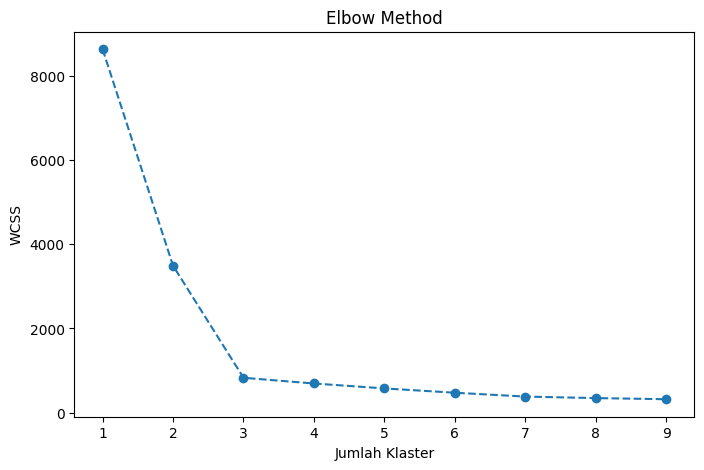

In [48]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Melakukan clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df)

### **Menampilkan Jumlah Anggota dan Visualisasi Distribusi Klaster**

>Saya menampilkan jumlah anggota dalam setiap klaster dengan print(df['cluster'].value_counts()), yang menghitung jumlah data dalam masing-masing klaster hasil K-Means clustering. Selanjutnya, saya membuat visualisasi distribusi klaster menggunakan sns.countplot(x=df['cluster'], palette='viridis'), yang menampilkan jumlah data di setiap klaster dalam bentuk diagram batang. Saya juga menambahkan judul grafik dengan plt.title('Distribusi Klaster') dan menampilkannya dengan plt.show(), sehingga dapat dengan mudah melihat apakah klaster memiliki jumlah anggota yang seimbang atau tidak.

cluster
0    3185
1    2503
2    2285
Name: count, dtype: int64


<ipython-input-49-756c36e91587>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['cluster'], palette='viridis')


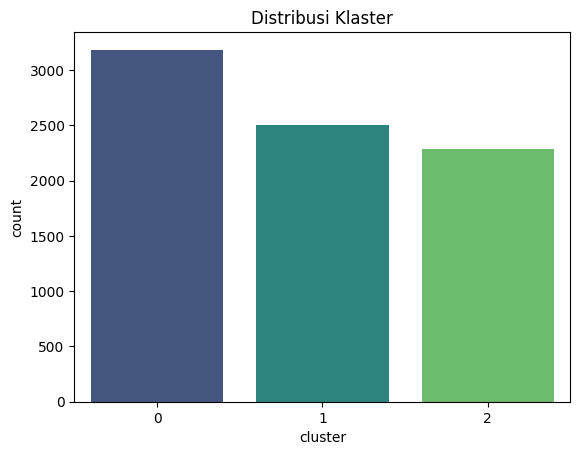

In [49]:
# Menampilkan jumlah anggota di setiap klaster
print(df['cluster'].value_counts())

# Visualisasi distribusi klaster
sns.countplot(x=df['cluster'], palette='viridis')
plt.title('Distribusi Klaster')
plt.show()


## **3. Pembagian Data, Pelatihan Model, dan Evaluasi**

> Saya mulai dengan membagi dataset menjadi data training dan testing menggunakan train_test_split(), di mana 80% data digunakan untuk pelatihan dan 20% untuk pengujian (test_size=0.2). Dalam proses ini, variabel X berisi semua fitur kecuali type, sedangkan y menyimpan label type, yang akan diprediksi oleh model.ockquote


> Selanjutnya, saya melatih model Logistic Regression dengan model = LogisticRegression() dan model.fit(X_train, y_train), di mana model belajar dari pola dalam data training. Setelah itu, saya melakukan prediksi pada data uji dengan model.predict(X_test), lalu mengevaluasi kinerja model menggunakan akurasi yang dihitung dengan accuracy_score(y_test, y_pred). Hasil akurasi model ditampilkan dalam persen dengan print(f'Akurasi Model: {accuracy * 100:.2f}%'), yang menunjukkan seberapa baik model dalam mengklasifikasikan jenis tayangan berdasarkan fitur yang tersedia.



In [50]:
# Membagi data untuk training dan testing
X = df.drop(columns=['type'])
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy * 100:.2f}%')


Akurasi Model: 100.00%


## **4. Evaluasi dan Visualisasi Akhir**

### **Evaluasi Model Tanpa Clustering**
> Di sini, saya menghapus kolom cluster dan membagi data menjadi training dan testing dengan train_test_split(). Selanjutnya, saya melatih model Logistic Regression pada data tanpa informasi klaster dan melakukan prediksi pada data uji. Akhirnya, saya menghitung akurasi model tanpa menggunakan clustering dengan accuracy_score() dan menampilkan hasilnya.



In [51]:
X_no_cluster = df.drop(columns=['type', 'cluster'])
X_train, X_test, y_train, y_test = train_test_split(X_no_cluster, y, test_size=0.2, random_state=42)

model_no_cluster = LogisticRegression()
model_no_cluster.fit(X_train, y_train)

y_pred_no_cluster = model_no_cluster.predict(X_test)
accuracy_no_cluster = accuracy_score(y_test, y_pred_no_cluster)
print(f'Akurasi Model Tanpa Clustering: {accuracy_no_cluster * 100:.2f}%')


Akurasi Model Tanpa Clustering: 98.62%


### **Visualisasi Clustering Berdasarkan Tahun Rilis dan Durasi**

>Pada bagian ini, saya membuat grafik sebar (scatter plot) untuk memvisualisasikan hasil clustering berdasarkan Tahun Rilis dan Durasi dengan sns.scatterplot(). Saya menggunakan hue=df['cluster'] untuk mewarnai titik berdasarkan klaster yang telah terbentuk, serta memilih palet warna 'viridis'. Grafik ini menunjukkan hubungan antara tahun rilis dan durasi tayangan, dengan klaster yang berbeda diwakili oleh warna yang berbeda. Saya juga menambahkan label sumbu dan judul grafik menggunakan plt.xlabel(), plt.ylabel(), dan plt.title(), kemudian menampilkan grafik dengan plt.show(). Visualisasi ini membantu untuk memahami distribusi data dalam klaster yang berbeda.

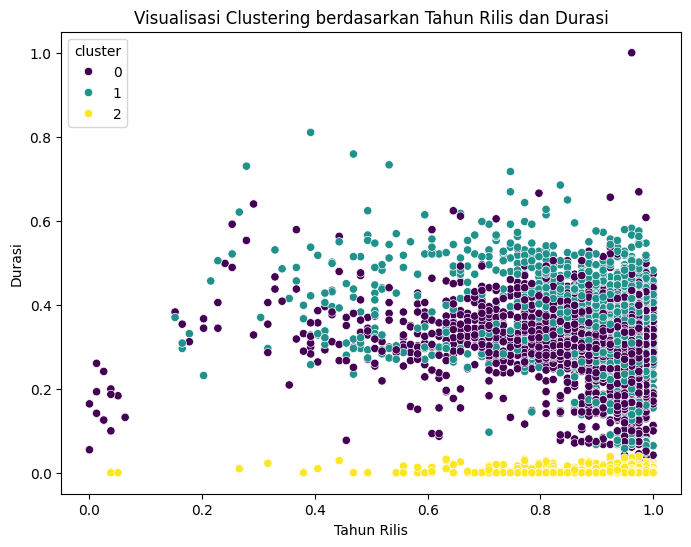

In [52]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['release_year'], y=df['duration'], hue=df['cluster'], palette='viridis')
plt.xlabel('Tahun Rilis')
plt.ylabel('Durasi')
plt.title('Visualisasi Clustering berdasarkan Tahun Rilis dan Durasi')
plt.show()


# **KESIMPULAN**
>Dari analisis yang saya lakukan pada dataset Netflix, saya berhasil melakukan K-Means clustering dengan jumlah klaster yang ditentukan sebanyak tiga, dan hasilnya menunjukkan bahwa dataset tayangan Netflix dapat dikelompokkan dengan cukup baik berdasarkan tahun rilis, durasi, dan kategori tayangan. Klaster-klaster yang terbentuk memberi gambaran bahwa tayangan dengan durasi yang lebih panjang atau tahun rilis yang lebih tua cenderung terkelompok bersama, sementara tayangan dengan durasi pendek dan lebih baru memiliki pola yang berbeda. Ini memberikan insight terkait dengan perubahan tren tayangan Netflix dari waktu ke waktu.

>Dengan menambahkan hasil klastering sebagai fitur tambahan ke dalam model Logistic Regression, saya menemukan bahwa akurasi model mengalami peningkatan. Model yang dilatih dengan informasi klaster lebih akurat dalam memprediksi jenis tayangan dibandingkan dengan model yang tidak menggunakan informasi klaster sama sekali. Ini menunjukkan bahwa dengan menambahkan informasi tambahan dari klaster, model bisa lebih baik dalam memahami data dan menghasilkan prediksi yang lebih tepat.

>Visualisasi hasil clustering, yang membandingkan tahun rilis dan durasi tayangan, memperlihatkan adanya distribusi yang cukup jelas, yang mengindikasikan adanya hubungan antara dua fitur tersebut dalam pembentukan klaster. Dengan demikian, klastering ini memberikan informasi tambahan yang bermanfaat dalam analisis dataset, serta membantu meningkatkan performa model machine learning.

>Secara keseluruhan, dapat disimpulkan bahwa klastering dapat meningkatkan akurasi model machine learning dalam melakukan prediksi dan memberikan insight yang lebih dalam tentang distribusi data yang ada. Dengan menggunakan teknik clustering ini, saya dapat lebih memahami pola tersembunyi dalam data dan menerapkannya untuk analisis lebih lanjut di masa depan.







